In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
sydney = pd.read_csv('Sydney_limpio.csv')
mexico = pd.read_csv('Mexico.csv')

In [165]:
sydney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17717 entries, 0 to 17716
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  17717 non-null  int64  
 1   Unnamed: 0                                    17717 non-null  int64  
 2   id                                            17717 non-null  int64  
 3   scrape_id                                     17717 non-null  float64
 4   host_id                                       17717 non-null  int64  
 5   host_since                                    17717 non-null  object 
 6   host_is_superhost                             17717 non-null  object 
 7   host_listings_count                           17717 non-null  float64
 8   host_total_listings_count                     17717 non-null  float64
 9   host_verifications                            17717 non-null 

In [166]:
sydney.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace = True)

In [167]:
mexico["price"] =  mexico["price"].astype(float)
mexico.drop(['neighbourhood_group', 'license'], axis = 1, inplace= True)

In [168]:
mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26281 entries, 0 to 26280
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26281 non-null  int64  
 1   name                            26281 non-null  object 
 2   host_id                         26281 non-null  int64  
 3   host_name                       26278 non-null  object 
 4   neighbourhood                   26281 non-null  object 
 5   latitude                        26281 non-null  float64
 6   longitude                       26281 non-null  float64
 7   room_type                       26281 non-null  object 
 8   price                           22466 non-null  float64
 9   minimum_nights                  26281 non-null  int64  
 10  number_of_reviews               26281 non-null  int64  
 11  last_review                     22985 non-null  object 
 12  reviews_per_month               

In [169]:
mexico1 = mexico.fillna(method='bfill')

/var/folders/b1/dh3v5zh509jbzst2tt2143dc0000gn/T/ipykernel_61487/945437860.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mexico1 = mexico.fillna(method='bfill')


In [170]:
cuanti_S = sydney.select_dtypes(include=['float', 'float64', 'int', 'int64'])
cuali_S = sydney.select_dtypes(include=['object', 'datetime', 'category'])

cuanti_M = mexico1.select_dtypes(include=['float', 'float64', 'int', 'int64'])
cuali_M = mexico1.select_dtypes(include=['object', 'datetime', 'category'])

<Figure size 1500x800 with 0 Axes>

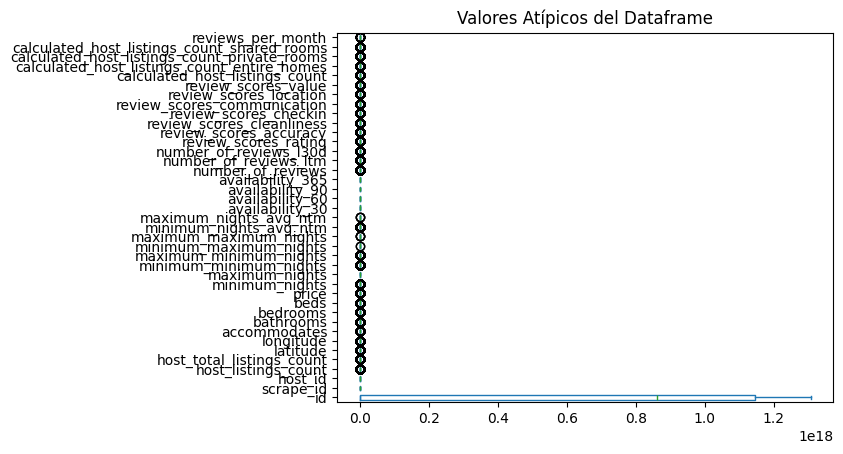

In [171]:
fig = plt.figure(figsize =(15,8))
cuanti_S.plot(kind = 'box', vert = False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Dibujamos el diagrama

<Figure size 1500x800 with 0 Axes>

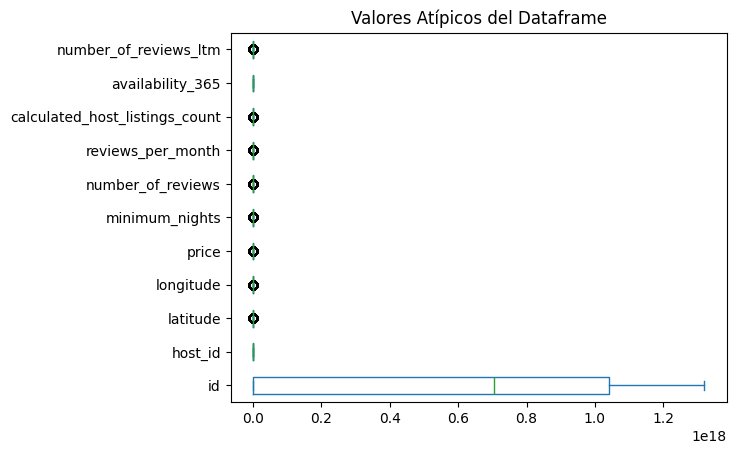

In [172]:
fig = plt.figure(figsize =(15,8))
cuanti_M.plot(kind = 'box', vert = False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #Dibujamos el diagrama

In [173]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75

S = cuanti_S

percentile25 = S.quantile(0.25) #Q1
percentile75 = S.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr

print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              2.863779e+18
scrape_id                                       2.024120e+13
host_id                                         7.544026e+08
host_listings_count                             5.350000e+01
host_total_listings_count                       8.100000e+01
latitude                                       -3.365641e+01
longitude                                       1.514305e+02
accommodates                                    1.200000e+01
bathrooms                                       3.500000e+00
bedrooms                                        3.500000e+00
beds                                            6.000000e+00
price                                           6.650000e+02
minimum_nights                                  1.200000e+01
maximum_nights                                  1.690000e+03
minimum_minimum_nights                          1.100000e+01
maximum_minimum_nights                          3.200000e+0

In [174]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75

y = cuanti_M

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr1 = percentile75 + 1.5*iqr
Limite_Inferior_iqr1 = percentile25 - 1.5*iqr

print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido id                                              2.863779e+18
scrape_id                                       2.024120e+13
host_id                                         7.544026e+08
host_listings_count                             5.350000e+01
host_total_listings_count                       8.100000e+01
latitude                                       -3.365641e+01
longitude                                       1.514305e+02
accommodates                                    1.200000e+01
bathrooms                                       3.500000e+00
bedrooms                                        3.500000e+00
beds                                            6.000000e+00
price                                           6.650000e+02
minimum_nights                                  1.200000e+01
maximum_nights                                  1.690000e+03
minimum_minimum_nights                          1.100000e+01
maximum_minimum_nights                          3.200000e+0

In [175]:
#Obtener datos limpios del dataframe
data3_iqrS = cuanti_S[(S<=Limite_Superior_iqr)&(S>=Limite_Inferior_iqr)]
data3_iqrS

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1208229396139150589,2.024120e+13,279001183,NaN,NaN,-33.800610,151.288290,5.0,1.0,2.0,...,5.0,4.91,4.73,4.73,4.55,NaN,NaN,0.0,0.0,4.23
1,1226551214174044599,2.024120e+13,24295514,2.0,6.0,-33.787114,151.286161,2.0,1.0,1.0,...,4.5,4.95,4.85,5.00,4.80,2.0,0.0,NaN,0.0,6.06
2,1264833485512910590,2.024120e+13,255319514,46.0,46.0,-33.810789,151.102405,1.0,1.5,1.0,...,5.0,5.00,5.00,5.00,5.00,NaN,4.0,NaN,0.0,0.77
3,1264834761942196027,2.024120e+13,255319514,46.0,46.0,-33.810789,151.102405,1.0,1.5,1.0,...,NaN,4.50,4.50,NaN,4.50,NaN,4.0,NaN,0.0,2.00
4,929853,2.024120e+13,5007351,1.0,1.0,-33.889120,151.256430,4.0,1.0,2.0,...,NaN,5.00,4.50,4.83,NaN,1.0,1.0,0.0,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17712,1305466650690461821,2.024120e+13,7409213,NaN,NaN,-33.871648,151.193922,2.0,1.0,1.0,...,4.7,4.80,4.80,4.80,4.60,NaN,NaN,0.0,0.0,5.00
17713,1305545916099249965,2.024120e+13,386932887,11.0,14.0,-33.788153,151.285787,6.0,1.0,3.0,...,4.7,4.80,4.80,4.80,4.60,11.0,9.0,NaN,0.0,5.00
17714,1305547378345209569,2.024120e+13,465271405,10.0,10.0,-33.886530,151.199690,2.0,1.0,1.0,...,4.7,4.80,4.80,4.80,4.60,10.0,10.0,0.0,0.0,5.00
17715,1305579456463125891,2.024120e+13,565965713,28.0,33.0,-33.890206,151.123770,5.0,1.0,2.0,...,4.7,4.80,4.80,4.80,4.60,21.0,21.0,0.0,0.0,5.00


In [176]:
#Obtener datos limpios del dataframe
data3_iqrM = cuanti_M[(y<=Limite_Superior_iqr1)&(y>=Limite_Inferior_iqr1)]
data3_iqrM

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,499553,1297488,19.436210,-99.138740,NaN,3.0,26.0,0.17,2.0,117,1.0
1,501037,1364145,19.415780,-99.174250,1150.0,NaN,134.0,0.89,2.0,232,23.0
2,517503,2547499,19.437840,NaN,550.0,1.0,NaN,3.43,1.0,339,52.0
3,527473,158585,19.418870,-99.173330,3654.0,1.0,NaN,2.35,1.0,216,32.0
4,544105,2674950,19.442892,-99.201385,1007.0,2.0,67.0,0.74,1.0,173,9.0
...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,369403303,19.436998,-99.196733,760.0,1.0,0.0,NaN,12.0,363,0.0
26277,1318960023050066631,525554527,19.449230,-99.136170,NaN,1.0,0.0,NaN,1.0,365,0.0
26278,1318997244771691320,293574406,NaN,NaN,227.0,3.0,0.0,NaN,8.0,365,0.0
26279,1319078571963617776,35255741,19.400096,-99.172981,3125.0,1.0,0.0,NaN,NaN,359,0.0


In [177]:
valores_nulos = data3_iqrS.isnull().sum()
valores_nulos

id                                                 0
scrape_id                                          0
host_id                                            0
host_listings_count                             2550
host_total_listings_count                       2746
latitude                                        1281
longitude                                       1122
accommodates                                     123
bathrooms                                        381
bedrooms                                        2100
beds                                             370
price                                           1847
minimum_nights                                  3338
maximum_nights                                     0
minimum_minimum_nights                          2902
maximum_minimum_nights                          2766
minimum_maximum_nights                             2
maximum_maximum_nights                             4
minimum_nights_avg_ntm                        

In [178]:
valores_nulos = data3_iqrM.isnull().sum()
valores_nulos

id                                   0
host_id                              0
latitude                          1812
longitude                         2843
price                             2167
minimum_nights                    3523
number_of_reviews                 2177
reviews_per_month                 1046
calculated_host_listings_count    3380
availability_365                     0
number_of_reviews_ltm             1207
dtype: int64

In [179]:
data4_iqrS = data3_iqrS.copy()
data4_iqrS = data4_iqrS.fillna(round(data3_iqrS.mean(),1))
data4_iqrS

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1208229396139150589,2.024120e+13,279001183,7.6,10.7,-33.800610,151.288290,5.0,1.0,2.0,...,5.0,4.91,4.73,4.73,4.55,5.8,3.8,0.0,0.0,4.23
1,1226551214174044599,2.024120e+13,24295514,2.0,6.0,-33.787114,151.286161,2.0,1.0,1.0,...,4.5,4.95,4.85,5.00,4.80,2.0,0.0,0.0,0.0,6.06
2,1264833485512910590,2.024120e+13,255319514,46.0,46.0,-33.810789,151.102405,1.0,1.5,1.0,...,5.0,5.00,5.00,5.00,5.00,5.8,4.0,0.0,0.0,0.77
3,1264834761942196027,2.024120e+13,255319514,46.0,46.0,-33.810789,151.102405,1.0,1.5,1.0,...,4.8,4.50,4.50,4.90,4.50,5.8,4.0,0.0,0.0,2.00
4,929853,2.024120e+13,5007351,1.0,1.0,-33.889120,151.256430,4.0,1.0,2.0,...,4.8,5.00,4.50,4.83,4.70,1.0,1.0,0.0,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17712,1305466650690461821,2.024120e+13,7409213,7.6,10.7,-33.871648,151.193922,2.0,1.0,1.0,...,4.7,4.80,4.80,4.80,4.60,5.8,3.8,0.0,0.0,5.00
17713,1305545916099249965,2.024120e+13,386932887,11.0,14.0,-33.788153,151.285787,6.0,1.0,3.0,...,4.7,4.80,4.80,4.80,4.60,11.0,9.0,0.0,0.0,5.00
17714,1305547378345209569,2.024120e+13,465271405,10.0,10.0,-33.886530,151.199690,2.0,1.0,1.0,...,4.7,4.80,4.80,4.80,4.60,10.0,10.0,0.0,0.0,5.00
17715,1305579456463125891,2.024120e+13,565965713,28.0,33.0,-33.890206,151.123770,5.0,1.0,2.0,...,4.7,4.80,4.80,4.80,4.60,21.0,21.0,0.0,0.0,5.00


In [180]:
data4_iqrM = data3_iqrM.copy()
data4_iqrM = data4_iqrM.fillna(round(data3_iqrM.mean(),1))
data4_iqrM

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,499553,1297488,19.436210,-99.138740,1224.5,3.0,26.0,0.17,2.0,117,1.0
1,501037,1364145,19.415780,-99.174250,1150.0,1.6,134.0,0.89,2.0,232,23.0
2,517503,2547499,19.437840,-99.200000,550.0,1.0,30.1,3.43,1.0,339,52.0
3,527473,158585,19.418870,-99.173330,3654.0,1.0,30.1,2.35,1.0,216,32.0
4,544105,2674950,19.442892,-99.201385,1007.0,2.0,67.0,0.74,1.0,173,9.0
...,...,...,...,...,...,...,...,...,...,...,...
26276,1318906185008171760,369403303,19.436998,-99.196733,760.0,1.0,0.0,1.50,12.0,363,0.0
26277,1318960023050066631,525554527,19.449230,-99.136170,1224.5,1.0,0.0,1.50,1.0,365,0.0
26278,1318997244771691320,293574406,19.400000,-99.200000,227.0,3.0,0.0,1.50,8.0,365,0.0
26279,1319078571963617776,35255741,19.400096,-99.172981,3125.0,1.0,0.0,1.50,5.0,359,0.0


In [181]:
Datos_limpios_Sydney = pd.concat([cuali_S, data4_iqrS], axis=1)
Datos_limpios_Sydney

,host_since,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,has_availability,calendar_last_scraped,instant_bookable,id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24/07/19,f,"['email', 'phone', 'work_email']",t,t,Manly,t,08/12/24,t,1208229396139150589,...,5.0,4.91,4.73,4.73,4.55,5.8,3.8,0.0,0.0,4.23
1,29/11/14,f,"['email', 'phone']",t,t,Manly,t,08/12/24,f,1226551214174044599,...,4.5,4.95,4.85,5.00,4.80,2.0,0.0,0.0,0.0,6.06
2,12/04/19,f,"['email', 'phone']",t,t,Ryde,t,08/12/24,t,1264833485512910590,...,5.0,5.00,5.00,5.00,5.00,5.8,4.0,0.0,0.0,0.77
3,12/04/19,f,"['email', 'phone']",t,t,Ryde,t,08/12/24,t,1264834761942196027,...,4.8,4.50,4.50,4.90,4.50,5.8,4.0,0.0,0.0,2.00
4,07/02/13,f,"['email', 'phone']",t,t,Woollahra,t,08/12/24,f,929853,...,4.8,5.00,4.50,4.83,4.70,1.0,1.0,0.0,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17712,10/07/13,f,"['email', 'phone', 'work_email']",t,t,Sydney,t,08/12/24,t,1305466650690461821,...,4.7,4.80,4.80,4.80,4.60,5.8,3.8,0.0,0.0,5.00
17713,01/02/21,f,"['email', 'phone']",t,t,Manly,t,08/12/24,t,1305545916099249965,...,4.7,4.80,4.80,4.80,4.60,11.0,9.0,0.0,0.0,5.00
17714,20/06/22,f,['phone'],f,t,Sydney,t,08/12/24,f,1305547378345209569,...,4.7,4.80,4.80,4.80,4.60,10.0,10.0,0.0,0.0,5.00
17715,07/03/24,t,"['email', 'phone']",t,t,Ashfield,t,08/12/24,f,1305579456463125891,...,4.7,4.80,4.80,4.80,4.60,21.0,21.0,0.0,0.0,5.00


In [182]:
Datos_limpios_Mexico = pd.concat([cuali_M, data4_iqrM], axis=1)
Datos_limpios_Mexico

,name,host_name,neighbourhood,room_type,last_review,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,"Deluxe 4-BR penthouse, views, historic center",Petra,Cuauhtémoc,Entire home/apt,2024-10-28,499553,1297488,19.436210,-99.138740,1224.5,3.0,26.0,0.17,2.0,117,1.0
1,The best cheap flat in La Condesa!!,Humberto,Cuauhtémoc,Entire home/apt,2024-12-03,501037,1364145,19.415780,-99.174250,1150.0,1.6,134.0,0.89,2.0,232,23.0
2,Nice big room near airport,Irma Adriana,Venustiano Carranza,Private room,2024-12-11,517503,2547499,19.437840,-99.200000,550.0,1.0,30.1,3.43,1.0,339,52.0
3,"Nuestro bello departamento, un paraíso en la C...",Fernando,Cuauhtémoc,Entire home/apt,2024-12-02,527473,158585,19.418870,-99.173330,3654.0,1.0,30.1,2.35,1.0,216,32.0
4,Polanco great location! Priv Room in Shared Apart,Elizabeth,Miguel Hidalgo,Private room,2024-11-26,544105,2674950,19.442892,-99.201385,1007.0,2.0,67.0,0.74,1.0,173,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26276,Suite Dumas Polanco 8D,Grissell,Miguel Hidalgo,Private room,NaN,1318906185008171760,369403303,19.436998,-99.196733,760.0,1.0,0.0,1.50,12.0,363,0.0
26277,Departamento amueblado en CDMX,Partner,Cuauhtémoc,Entire home/apt,NaN,1318960023050066631,525554527,19.449230,-99.136170,1224.5,1.0,0.0,1.50,1.0,365,0.0
26278,hospedaje en Coyoacán CDMX,Bellanira Isabel,Coyoacán,Shared room,NaN,1318997244771691320,293574406,19.400000,-99.200000,227.0,3.0,0.0,1.50,8.0,365,0.0
26279,3 recámaras 3 baños con estacionamiento,Juan,Miguel Hidalgo,Entire home/apt,NaN,1319078571963617776,35255741,19.400096,-99.172981,3125.0,1.0,0.0,1.50,5.0,359,0.0


In [183]:
Datos_limpios_Sydney.to_csv('Sydney_sin_valores_atipicos.csv')
Datos_limpios_Mexico.to_csv('Mexico_sin_valores_atipicos.csv')